In [3]:
import numpy as np
import matplotlib.pyplot as plt


Create some random data, roughly following a parabola

In [4]:
N = 100
c0, c1, c2 = np.random.random(3)
x = np.linspace(-5, 5, N)
y0 = c0 + c1*x + c2*x**2
sigma = 1
y = y0 + sigma*np.random.normal(size=N)

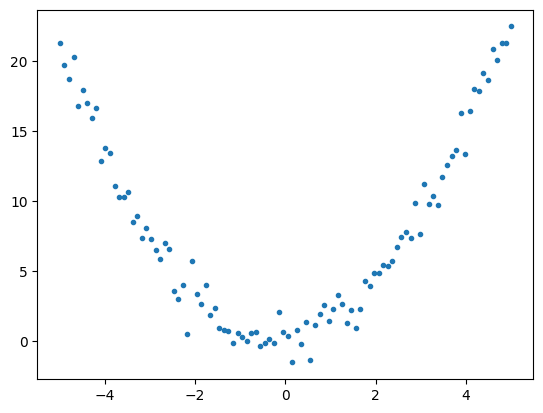

In [5]:
plt.plot(x,y,'.')

We now do a linear fit to approximate the data by a quadratic function

In [15]:
m = 3 # A quadratic function has three coefficients

# We now make a matrix, whose i'th row is 
# [x[i] ** 0, x[i] ** 1, x[i] ** 2] = [1, x[i], x[i]**2]
x_powers = x.reshape((N,1)) ** np.arange(m) 

# General theory tells us that the optimal vector of coefficients beta is
# found by solving the linear system A beta = b, where 
# A = x_powers^T x_powers
A = x_powers.T @ x_powers
b = x_powers.T @ y
beta = np.linalg.solve(A, b)
print(f'beta = {beta}')

beta = [0.20971617 0.25610986 0.88535103]


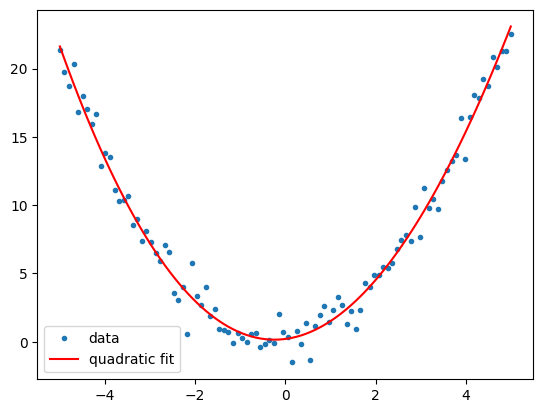

In [13]:
# Our model that y[i] should be approximately beta[0] + beta[1] * x + beta[2] * x**2
# These predicted values can be computed efficiently as the product of the matrix
# x_powers and the vector beta
y_pred = x_powers @ beta
plt.plot(x, y, '.', label='data')
plt.plot(x, y_pred, 'r-', label='quadratic fit')
plt.legend()

In [8]:
x_powers.T @ x_powers

array([[1.00000000e+02, 3.55271368e-15, 8.50168350e+02, 2.70006240e-13],
       [3.55271368e-15, 8.50168350e+02, 4.68958206e-13, 1.30084172e+04],
       [8.50168350e+02, 4.68958206e-13, 1.30084172e+04, 1.36424205e-12],
       [2.70006240e-13, 1.30084172e+04, 1.36424205e-12, 2.36922756e+05]])